# **MILESTONE 1**

# Step 1: Exploratory Data Analysis (EDA)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler

In [4]:
# Create DF with CSV file
read_csv = pd.read_csv('StudentPerformanceFactors.csv')
df = pd.DataFrame(read_csv)

I chose this dataset because it is relevant to me as I am also a student. This is a dataset found on Kaggle that shows how social, educational, and personal factors impact a students' final exam results. It has missing values so it is gret for the purpose of this assignment.

In [5]:
# Display the first few rows to look at the data
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [6]:
# Basic info about dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
# Shape of dataset (rows, columns)
df.shape

(6607, 20)

These commands show the structure of the dataset. This specific dataset has 6607 rows and 20 columns. There are also a variety of variables including continuous and categorical.

In [8]:
# Display the number of unique values per variable
df.nunique()

,0
Hours_Studied,41
Attendance,41
Parental_Involvement,3
Access_to_Resources,3
Extracurricular_Activities,2
Sleep_Hours,7
Previous_Scores,51
Motivation_Level,3
Internet_Access,2
Tutoring_Sessions,9


This command is to see the number of unique values for each variable name. The variables that have small numbers of unique values mean that they are categorical variables, and the larger number of unique variables indicates that it is a continous variable. It's useful to know this information to use for encoding.

In [9]:
#Continuous variable statistics and visualizations
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


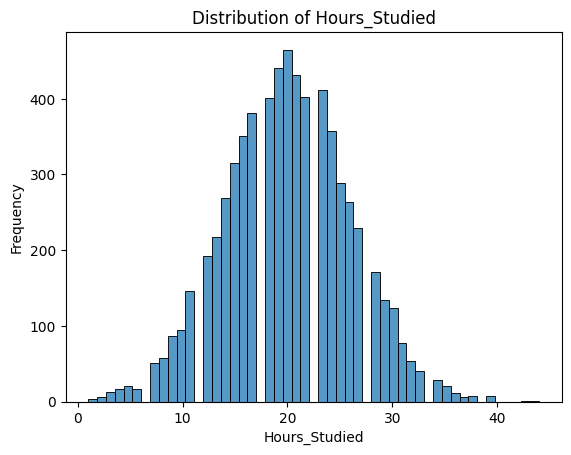

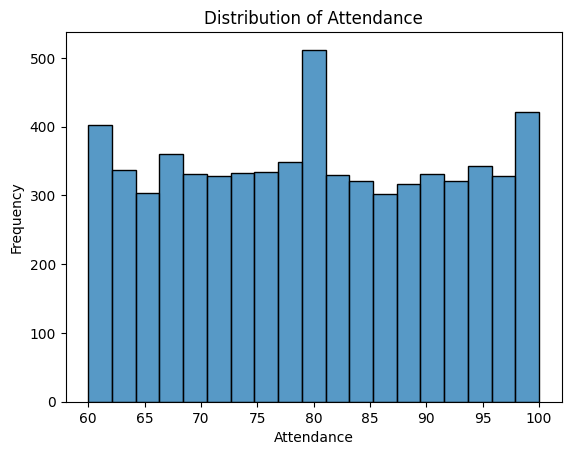

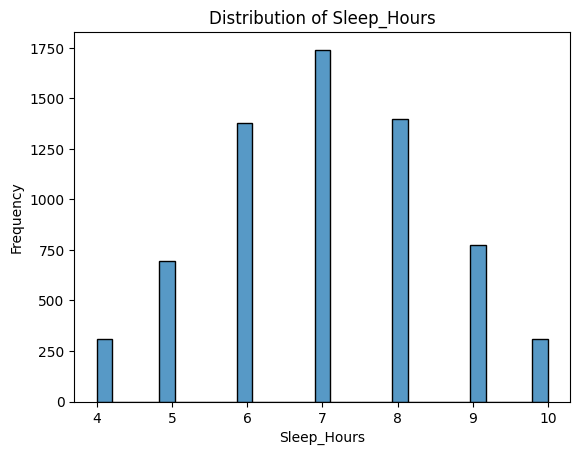

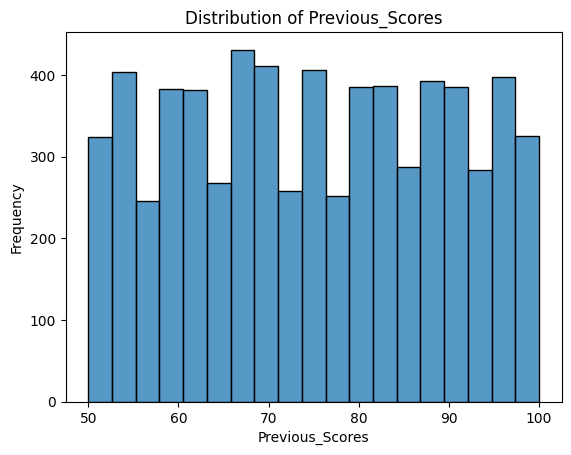

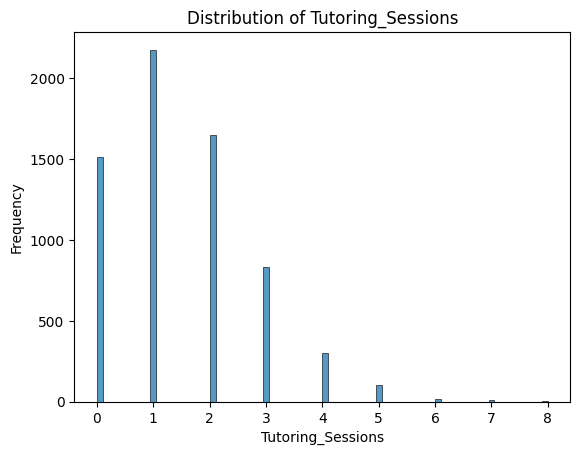

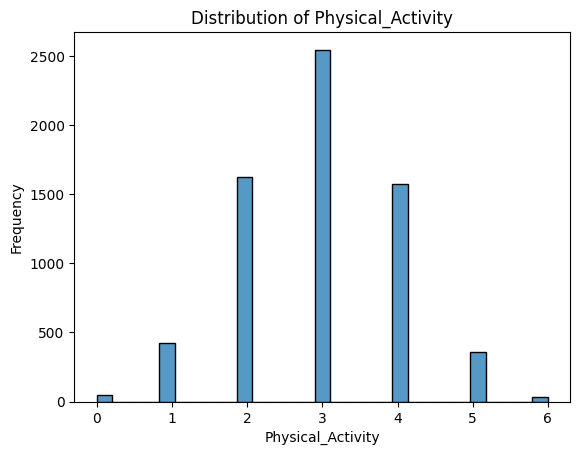

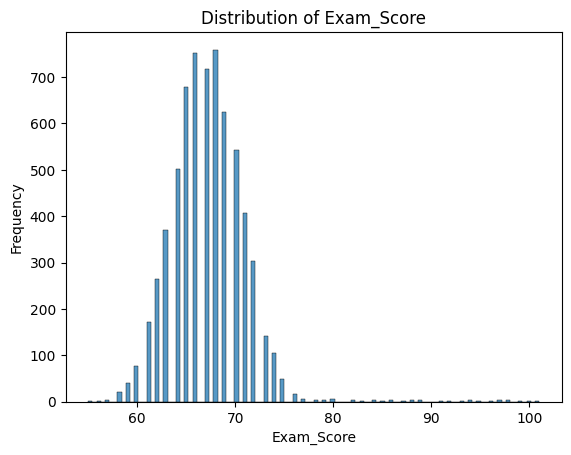

In [10]:
# Make histograms for continuous variables in one go
continuous_cols = df.select_dtypes(include=['float64','int64']).columns

for col in continuous_cols:
    sns.histplot(df[col], kde=False)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

These are the summary statistics for continuous variables in the dataset. This can be used to see outliers and see how the data is distributed. The histograms for each continuous variable are also shown, where the distributions of different continuous variable data can be seen.

Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64


Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64


Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64


Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64


Internet_Access
Yes    6108
No      499
Name: count, dtype: int64


Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64


Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64


School_Type
Public     4598
Private    2009
Name: count, dtype: int64


Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64


Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64


Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64


Distance_from_Home
Near        3884
Moderate

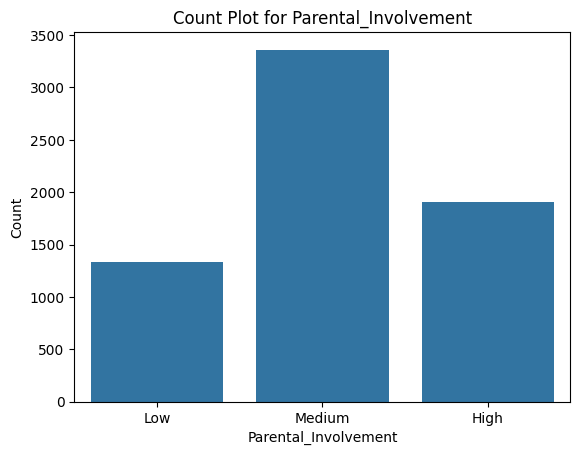

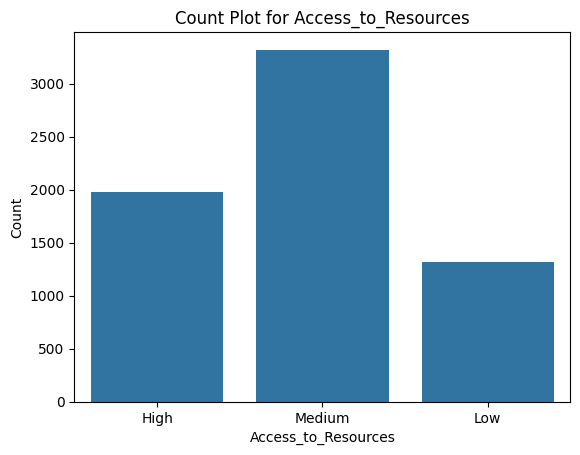

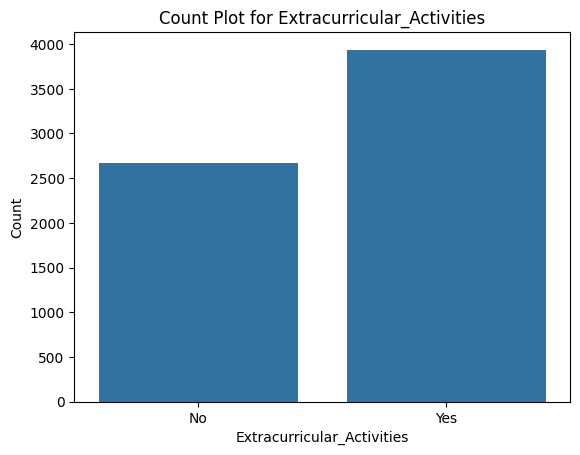

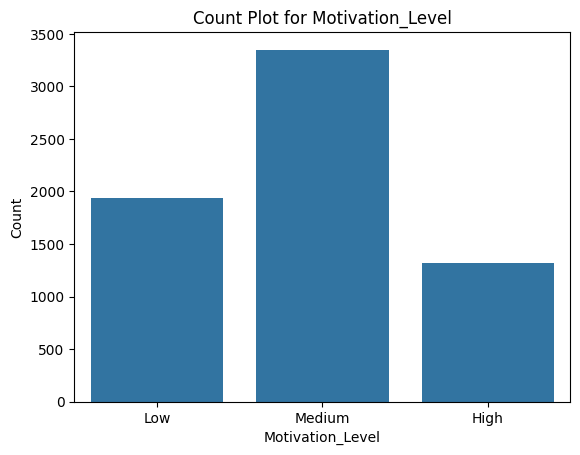

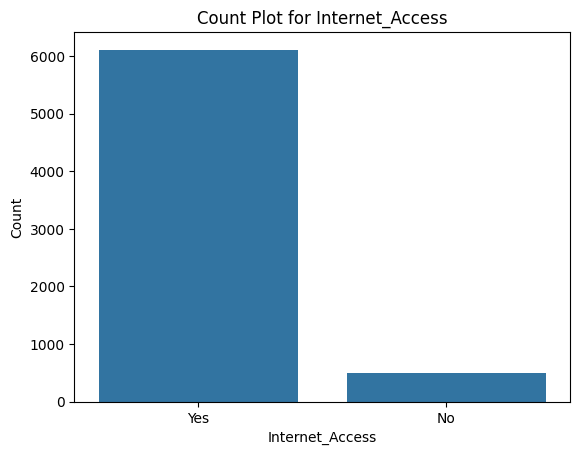

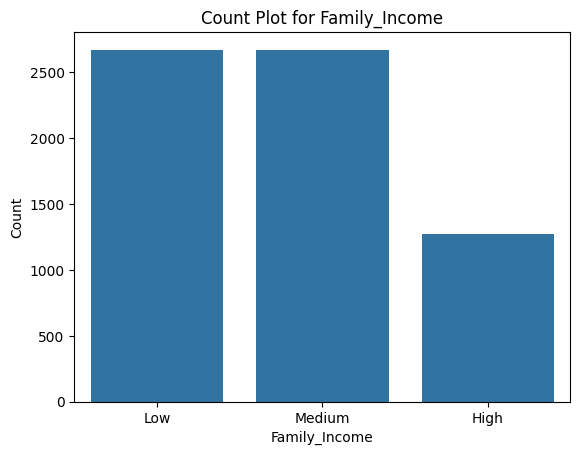

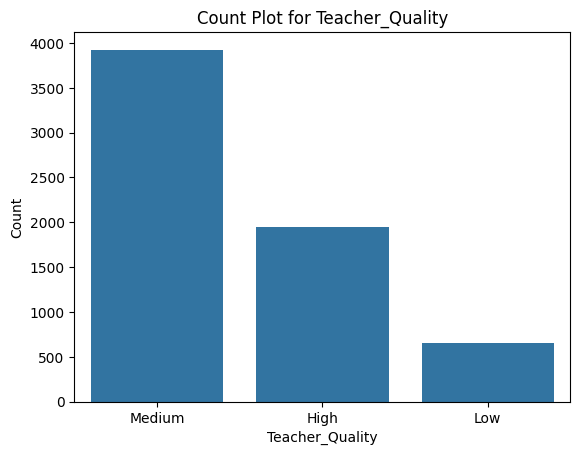

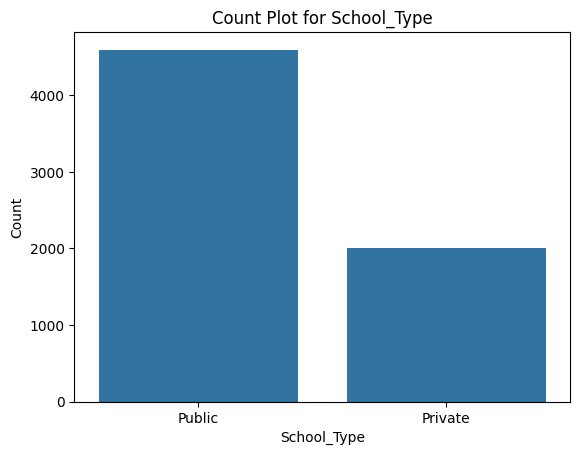

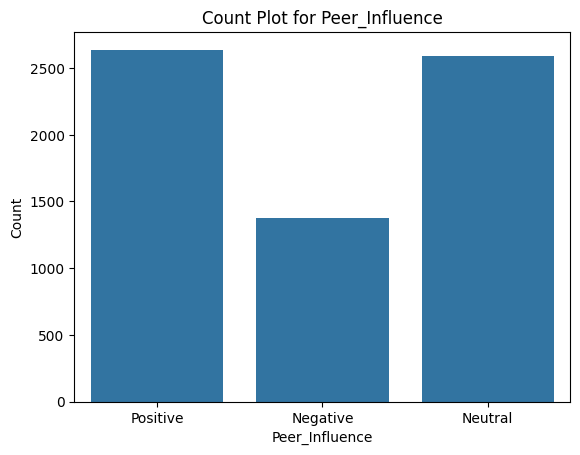

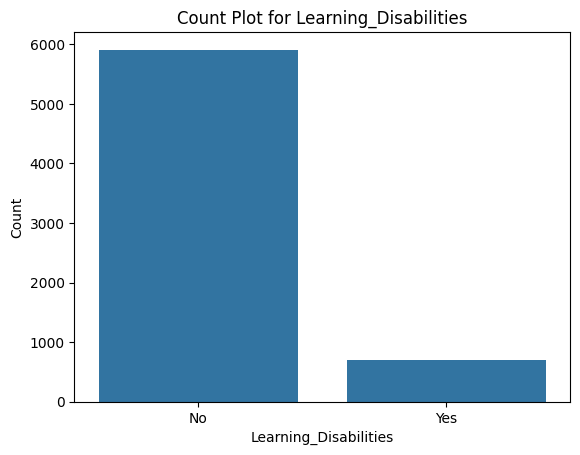

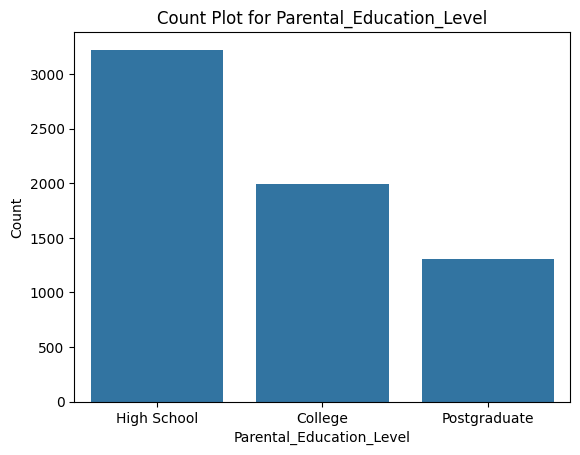

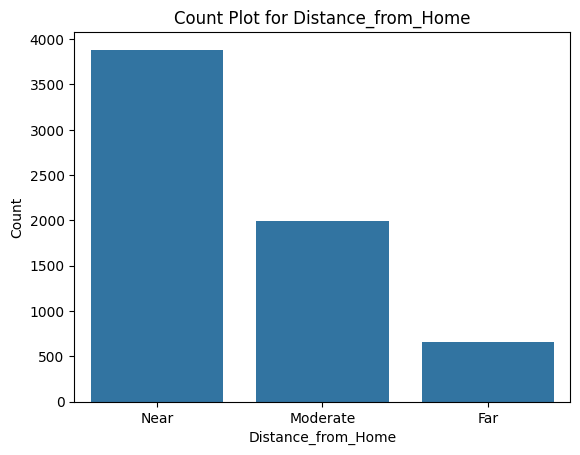

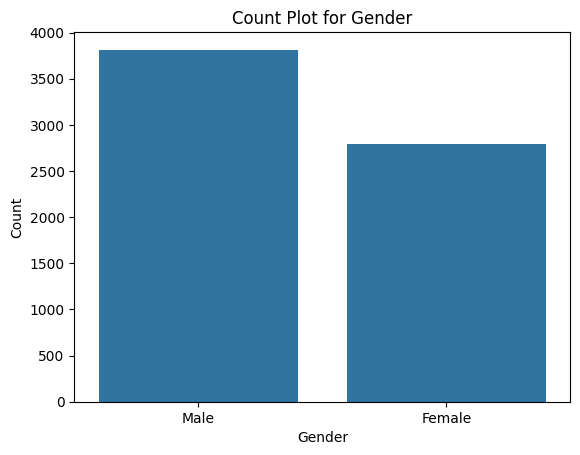

In [11]:
# Categorical variable statistics and visualizations
# Frequency counts for all categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(df[col].value_counts())
    print("\n")

# Make count plots for categorical variables in one go
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

These are the summary statistics for categorical variables in the dataset, particularly the frequency counts. The count plots for each categorical variable are also displayed, where the count of a category for a variable is shown and can be used to see which ones are most or least common. This will help for encoding and handling of data.

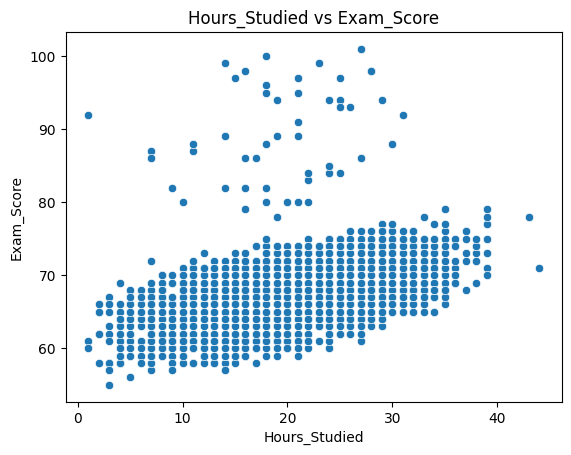

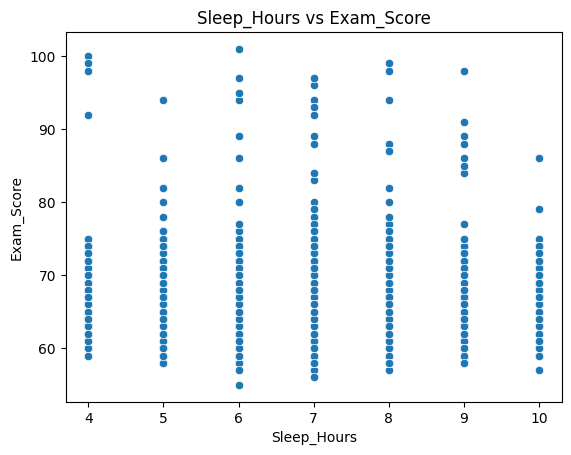

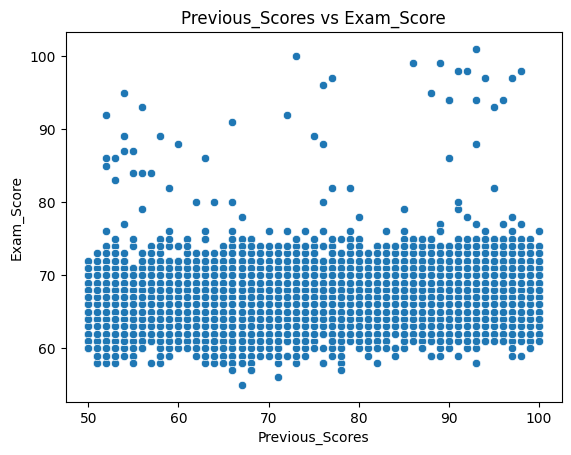

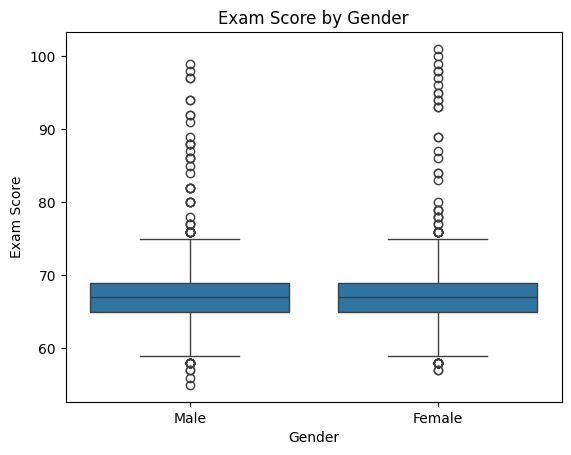

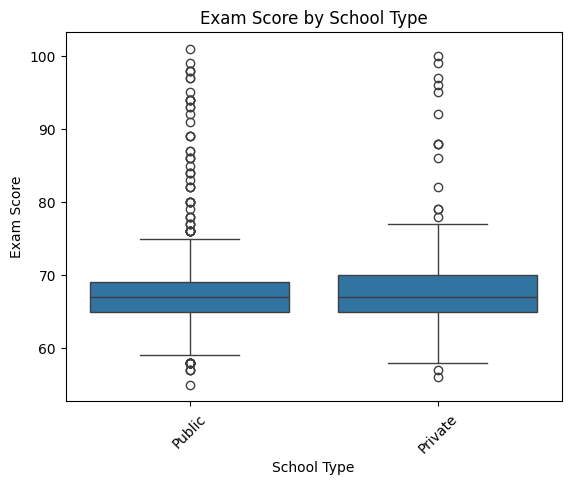

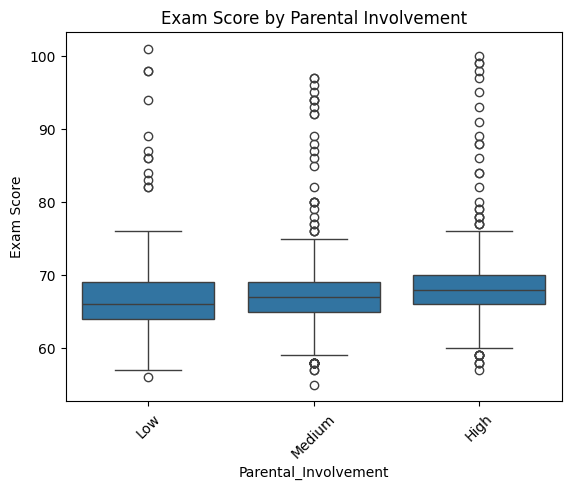

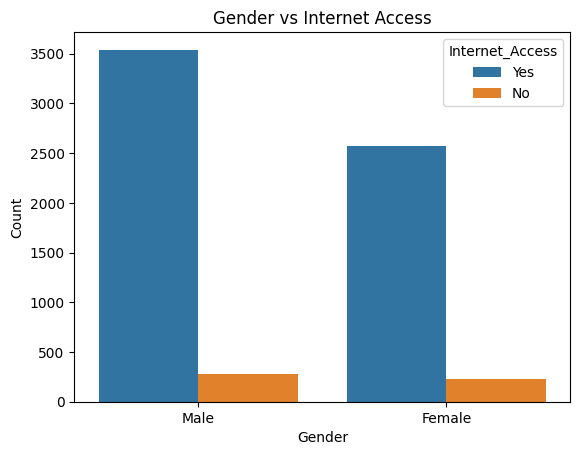

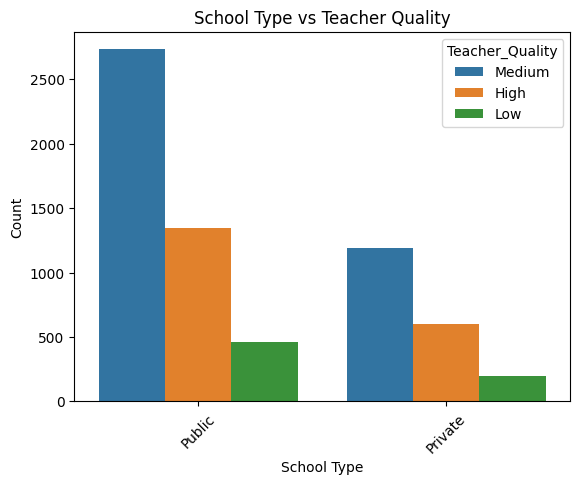

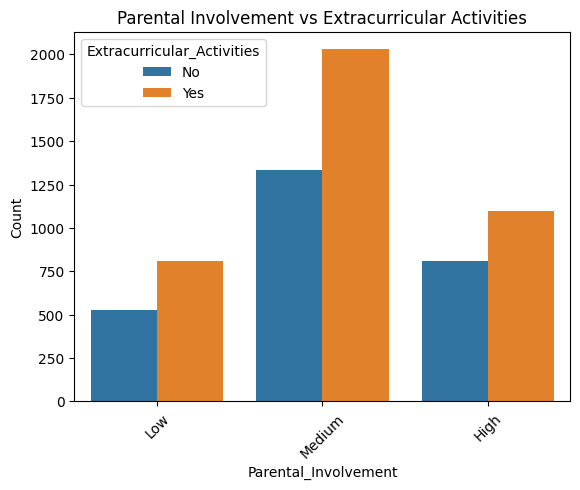

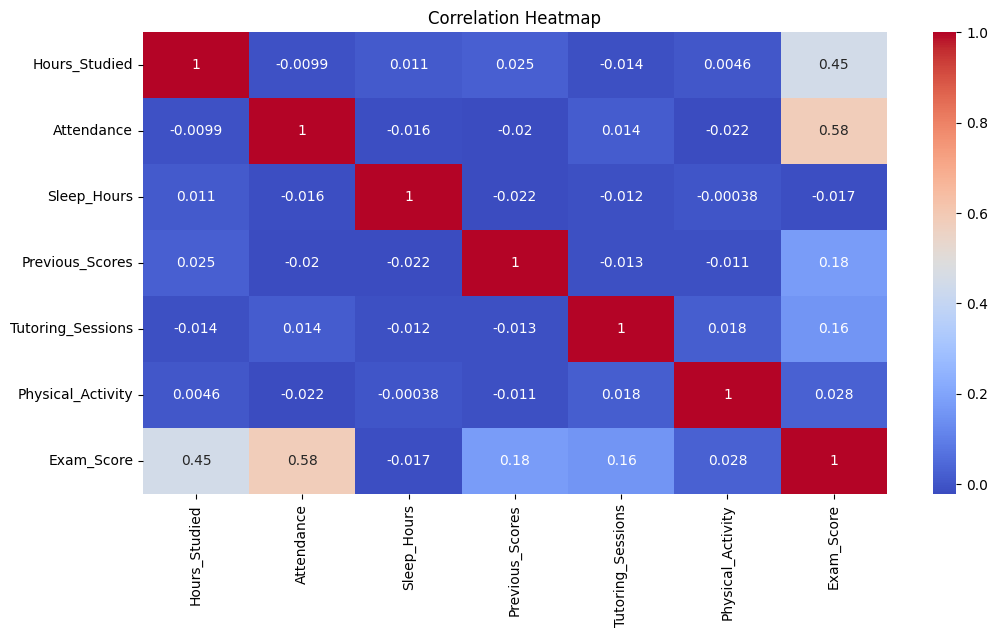

In [12]:
# Visualize relationships between variables
# Continuous variable vs continuous variable
sns.scatterplot(x="Hours_Studied", y="Exam_Score", data=df)
plt.title("Hours_Studied vs Exam_Score")
plt.xlabel("Hours_Studied")
plt.ylabel("Exam_Score")
plt.show()

sns.scatterplot(x="Sleep_Hours", y="Exam_Score", data=df)
plt.title("Sleep_Hours vs Exam_Score")
plt.xlabel("Sleep_Hours")
plt.ylabel("Exam_Score")
plt.show()

sns.scatterplot(x="Previous_Scores", y="Exam_Score", data=df)
plt.title("Previous_Scores vs Exam_Score")
plt.xlabel("Previous_Scores")
plt.ylabel("Exam_Score")
plt.show()

# Continuous variable vs categorical variable
sns.boxplot(x="Gender", y="Exam_Score", data=df)
plt.title("Exam Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Exam Score")
plt.show()

sns.boxplot(x="School_Type", y="Exam_Score", data=df)
plt.title("Exam Score by School Type")
plt.xlabel("School Type")
plt.ylabel("Exam Score")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x="Parental_Involvement", y="Exam_Score", data=df)
plt.title("Exam Score by Parental Involvement")
plt.xlabel("Parental_Involvement")
plt.ylabel("Exam Score")
plt.xticks(rotation=45)
plt.show()

# Categorical variable vs categorical variable
sns.countplot(x="Gender", hue="Internet_Access", data=df)
plt.title("Gender vs Internet Access")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

sns.countplot(x="School_Type", hue="Teacher_Quality", data=df)
plt.title("School Type vs Teacher Quality")
plt.xlabel("School Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

sns.countplot(x="Parental_Involvement", hue="Extracurricular_Activities", data=df)
plt.title("Parental Involvement vs Extracurricular Activities")
plt.xlabel("Parental_Involvement")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In order to visualize relationships between variables, I first made scatter plots for a continuous and continuous variable relationship. Then I made scatter plots for a continuous and categorical variable relationship. And finally, I made scatter plots for a categorical and categorical variable relationship.

At the very bottom, I made a heatmap of correlations between continuous variables to show the correlation between them.

In [13]:
# Identification of outliers in the dataset
numerical_df = df.select_dtypes(include=['float64', 'int64'])
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numerical_df < (Q1 - 1.5*IQR)) | (numerical_df > (Q3 + 1.5*IQR))).sum()
outliers

,0
Hours_Studied,43
Attendance,0
Sleep_Hours,0
Previous_Scores,0
Tutoring_Sessions,430
Physical_Activity,0
Exam_Score,104


In order to identify outliers in the dataset, I calculated the IQR for each variable and then created a boundary for values and any of them outside are considered outliers. The purpose of finding the outliers is to analyze the data skewness and later handle those outliers.

# Step 2: Data Cleaning

In [14]:
# Find missing values throughout all variables
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In order to see how many missing values each variable has, this is the command for that. This will be used for handling missing values and making the model even more accurate.

In [15]:
# Handle continuous variable missing values
for col in continuous_cols:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Filled missing values in {col} with median ({median_value})") # Use median value

# Handle categorical variable missing values
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"Filled missing values in {col} with mode ('{mode_value}')") # Use mode value

Filled missing values in Teacher_Quality with mode ('Medium')
Filled missing values in Parental_Education_Level with mode ('High School')
Filled missing values in Distance_from_Home with mode ('Near')


/tmp/ipython-input-1369104497.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In order to handle missing continuous variable values, I used the median to fill those values. And in order to handle missing categorical variable values, I used the mode to fill those values. Missing values were specifically filled in the three variables shown in the output above.

In [16]:
# Standardize data formats using categorical encoding
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip()

In order to standardize data formats, I made sure that the categorical variable data doesn't have any extra spaces so that it won't impact the analysis.

In [17]:
# Remove/address outliers using IQR capping
for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap values outside range
    outliers1 = df[(df[col] < lower) | (df[col] > upper)][col].count()
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
    outliers2 = df[(df[col] < lower) | (df[col] > upper)][col].count()

    print(f"{col}: Capped {outliers1} outliers (now {outliers2})")

Hours_Studied: Capped 43 outliers (now 0)
Attendance: Capped 0 outliers (now 0)
Sleep_Hours: Capped 0 outliers (now 0)
Previous_Scores: Capped 0 outliers (now 0)
Tutoring_Sessions: Capped 430 outliers (now 0)
Physical_Activity: Capped 0 outliers (now 0)
Exam_Score: Capped 104 outliers (now 0)


In order to remove or address outliers, I used IQR capping to make sure that the outliers won't impact the overall distribution of the data amongst the variables. There were actually no outliers detected in this dataset though, that's why it shows 0.

In [18]:
# Look at missing values again - should be none now since they're replaced
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In order to test the impact of the data handling for the missing values, I put in this command again. This time it shows that there are no missing values at all.

# Step 3: Feature Engineering

In [19]:
# Create new features to enhance predictive power of model
# Feature 1: Study Efficiency - hours studied compared to sleep time
df["Study_Efficiency"] = df["Hours_Studied"] / (df["Sleep_Hours"] + 1)
# Feature 2: Score Improvement - exam score compared to previous exam scores
df["Score_Improvement"] = df["Exam_Score"] - df["Previous_Scores"]
print("New features: ")
print(df[["Hours_Studied", "Sleep_Hours", "Study_Efficiency",
          "Exam_Score", "Previous_Scores", "Score_Improvement"]].head())

New features: 
   Hours_Studied  Sleep_Hours  Study_Efficiency  Exam_Score  Previous_Scores  \
0           23.0          7.0          2.875000        67.0             73.0   
1           19.0          8.0          2.111111        61.0             59.0   
2           24.0          7.0          3.000000        74.0             91.0   
3           29.0          8.0          3.222222        71.0             98.0   
4           19.0          6.0          2.714286        70.0             65.0   

   Score_Improvement  
0               -6.0  
1                2.0  
2              -17.0  
3              -27.0  
4                5.0  


In order to enhance the predictive power of the model, I created two new features. The first one is study efficiency, which uses the hours studied and the number of hours slept to see how much students study compared to sleep time. The second one is score improvement, which used the exam score and the previous exam scores to see how better students perform on their exams and allows to statistically see the improvement. The purpose of adding these features is to further analyze the data and make new relationships based on the raw data.

In [20]:
# Transform categorical variables into numerical ones using one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(df_encoded.head())

   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
0           23.0        84.0          7.0             73.0                0.0   
1           19.0        64.0          8.0             59.0                2.0   
2           24.0        98.0          7.0             91.0                2.0   
3           29.0        89.0          8.0             98.0                1.0   
4           19.0        92.0          6.0             65.0                3.0   

   Physical_Activity  Exam_Score  Study_Efficiency  Score_Improvement  \
0                3.0        67.0          2.875000               -6.0   
1                4.0        61.0          2.111111                2.0   
2                4.0        74.0          3.000000              -17.0   
3                4.0        71.0          3.222222              -27.0   
4                4.0        70.0          2.714286                5.0   

   Parental_Involvement_Low  ...  Teacher_Quality_Medium  School_Type_Publ

In order to prepare the data for modeling in the future parts of this assignment, categorical variables are transformed into continuous variables. I used one-hot encoding by first converting each category to a binary column and then saw that the dataset now has more columns. The columns include the original continuous variables and thse transformed continuous variables so that the dataset is in one type.

In [21]:
# Normalize/standardize numerical features
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
print(df_encoded.head())

   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
0       0.508885    0.348375    -0.019796        -0.143800          -1.310621   
1      -0.163320   -1.383736     0.661399        -1.116110           0.514305   
2       0.676936    1.560853    -0.019796         1.106313           0.514305   
3       1.517192    0.781403     0.661399         1.592469          -0.398158   
4      -0.163320    1.041220    -0.700990        -0.699406           1.426768   

   Physical_Activity  Exam_Score  Study_Efficiency  Score_Improvement  \
0           0.031411   -0.037697          0.319050           0.137526   
1           1.001199   -1.816712         -0.500050           0.703656   
2           1.001199    2.037821          0.453084          -0.640901   
3           1.001199    1.148313          0.691368          -1.348563   
4           1.001199    0.851811          0.146719           0.915954   

   Parental_Involvement_Low  ...  Teacher_Quality_Medium  School_Type_Publ

In order to standardize numerical features, I used Standardization using StandardScaler. This helped to have each numerical column a mean of 0 and standard deviation of 1 and also prevent large-numbered features from overthrowing the smaller ones. The result of this scaling is standardizing numerical features and leaving the one-hot encoded categorical features as is. This is also to prepare the dataset for modeling in the later assignment.

In [22]:
# Result
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Hours_Studied                          6607 non-null   float64
 1   Attendance                             6607 non-null   float64
 2   Sleep_Hours                            6607 non-null   float64
 3   Previous_Scores                        6607 non-null   float64
 4   Tutoring_Sessions                      6607 non-null   float64
 5   Physical_Activity                      6607 non-null   float64
 6   Exam_Score                             6607 non-null   float64
 7   Study_Efficiency                       6607 non-null   float64
 8   Score_Improvement                      6607 non-null   float64
 9   Parental_Involvement_Low               6607 non-null   bool   
 10  Parental_Involvement_Medium            6607 non-null   bool   
 11  Acce

In this assignment, after analyzing the raw dataset, missing values were found and handled. The categorical columns were further expanded and made into more columns. So now, the dataset consists of 6607 rows and 30 columns, 10 more columns than the original dataset. There are a total of 9 numerical features and 21 categorical features. At the end, there are no missing values after the missing value handling and the data is checked from extra spaces as well. The ending memory usage is 600.2 KB.

# **MILESTONE 2**

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Step 1: Model Selection

**The following is my selection of machine learning models based on my data and problem type:**

The target variable for my model is "Exam_Score" and since this is a continuous variable, the problem type is a regression problem.

Some appropriate machine learning models based on my data and problem type are: -Linear Regression: Basic model we learned about first
-Ridge Regression: Linear regression with extra controls to prevent overfitting
-Random Forest Regression: Uses multiple decision trees together
-Gradient Boosting Regressor: Builds trees that learn from previous mistakes

**The following is the justification of my model choices and their strengths and weaknesses, in relation to my dataset:**

I chose Linear Regression model because this is the most standard model for regression. The main strength is that it's simple to understand and the coefficients tell exactly how much each feature affects exam scores. The main weakness is that it assumes everything is a straight-line relationship, which might not be true for student data.

I chose Ridge Regression model because it handles multicollinearity better than standard linear regression. The main strength is that it prevents overfitting by adding a penalty to large coefficients while keeping model interpretability. The main weakness is that it doesn't perform feature selection and requires tuning the regularization parameter.

I chose Random Forest model because it can capture complex non-linear relationships in the data. The main strength is that it handles mixed data types well and provides feature importance rankings. The main weakness is that it's less interpretable than linear models and can be computationally expensive.

I chose Gradient Boosting model because it often achieves high accuracy on tabular data. The main strength is that it sequentially improves predictions by focusing on previous errors. The main weakness is that it requires careful hyperparameter tuning and is sensitive to overfitting.

# Step 2: Model Training

In [24]:
# Split the dataset into training and testing sets
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print(f"Training set: {X_train.shape[0]} students")
print(f"Testing set: {X_test.shape[0]} students")

Training set: 4624 students
Testing set: 1983 students


In class, we learned about splitting data into training and testing sets. I'm using a 70-30 split, which means 70% of the data for training and 30% for testing. This gives enough data to train the models while still having a good amount left to test how well they work on new data.

In [25]:
# Organize the variables again
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Set up preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())  # Scale numbers for linear models
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Setup models for testing
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

Before training, I need to prepare the data properly. In class, we learned that some models work better when data is scaled, and we need to handle categorical variables. I'm creating pipelines that automatically handle scaling numerical features and encoding categorical features. This prevents data leakage and makes sure everything is consistent.

In [26]:
# Perform cross-validation
cv_results = {}
for name, model in models.items():
  pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
  cv_rmse_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

  cv_rmse = (-cv_rmse_scores) ** 0.5

  cv_r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

  cv_mae_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

  cv_mae = -cv_mae_scores

  cv_results[name] = {
        'cv_rmse_mean': cv_rmse.mean(),
        'cv_rmse_std': cv_rmse.std(),
        'cv_r2_mean': cv_r2_scores.mean(),
        'cv_r2_std': cv_r2_scores.std(),
        'cv_mae_mean': cv_mae.mean(),
        'cv_mae_std': cv_mae.std()
  }

Model parameters were optimized by using cross-validation. The professor taught us that instead of just one train-test split, we should use cross-validation to get more reliable results. I'm using 5-fold cross-validation, which means that first you split the training data into 5 parts, then you train on 4 parts and test on 1 part, then you repeat this 5 times, each time with a different test part, and then you average the results to see how each model really performs.

In [27]:
final_results = []
for name, model in models.items():
  pipeline = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('model', model)
  ])

  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  final_results.append({
      'Model': name,
      'RMSE': rmse,
      'MAE': mae,
      'R²': r2,
      'predictions': y_pred,
      'pipeline': pipeline
  })

  print(f"{name:20} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | R²: {r2:.4f}")

results_df = pd.DataFrame(final_results).drop(['predictions', 'pipeline'], axis=1)
results_df = results_df.sort_values('RMSE')

Linear Regression    | RMSE: 0.0000 | MAE: 0.0000 | R²: 1.0000
Ridge Regression     | RMSE: 0.0828 | MAE: 0.0352 | R²: 0.9994
Random Forest        | RMSE: 1.2211 | MAE: 0.9069 | R²: 0.8665
Gradient Boosting    | RMSE: 0.9902 | MAE: 0.6802 | R²: 0.9122


I evaluated model performance by using these suitable metrics: RMSE (root mean squared error), MAE (mean absolute error), and R^2 (r-squared). RMSE shows how wrong the predictions are on average, and smaller values mean better. MAE shows the average amount of the error. R^2 shows how much of the variation in exam scores the model explains.

In [28]:
# First find the best model of the four
best_model_result = final_results[results_df.index[0]]
best_model_name = best_model_result['Model']
best_model_pipeline = best_model_result['pipeline']
print(f"Best model: {best_model_name}")

# Compare the performance of the different models
for i, result in enumerate(final_results):
    if result['Model'] == best_model_name:
        print(f"✓ {result['Model']:20} - BEST")
    else:
        rmse_diff = result['RMSE'] - best_model_result['RMSE']
        r2_diff = best_model_result['R²'] - result['R²']
        print(f"  {result['Model']:20} - RMSE: +{rmse_diff:.4f}, R²: -{r2_diff:.4f}")

Best model: Linear Regression
✓ Linear Regression    - BEST
  Ridge Regression     - RMSE: +0.0828, R²: -0.0006
  Random Forest        - RMSE: +1.2211, R²: -0.1335
  Gradient Boosting    - RMSE: +0.9902, R²: -0.0878


Above, I compared the performace of the four models and found that the Linear regression model is the best for my data and particularly for predicting exam scores. Also, the model with the lowest RMSE and highest R² is probably the best choice, which again is the linear regression model. I compared the models by just showing how much of a difference those values are from the best one.

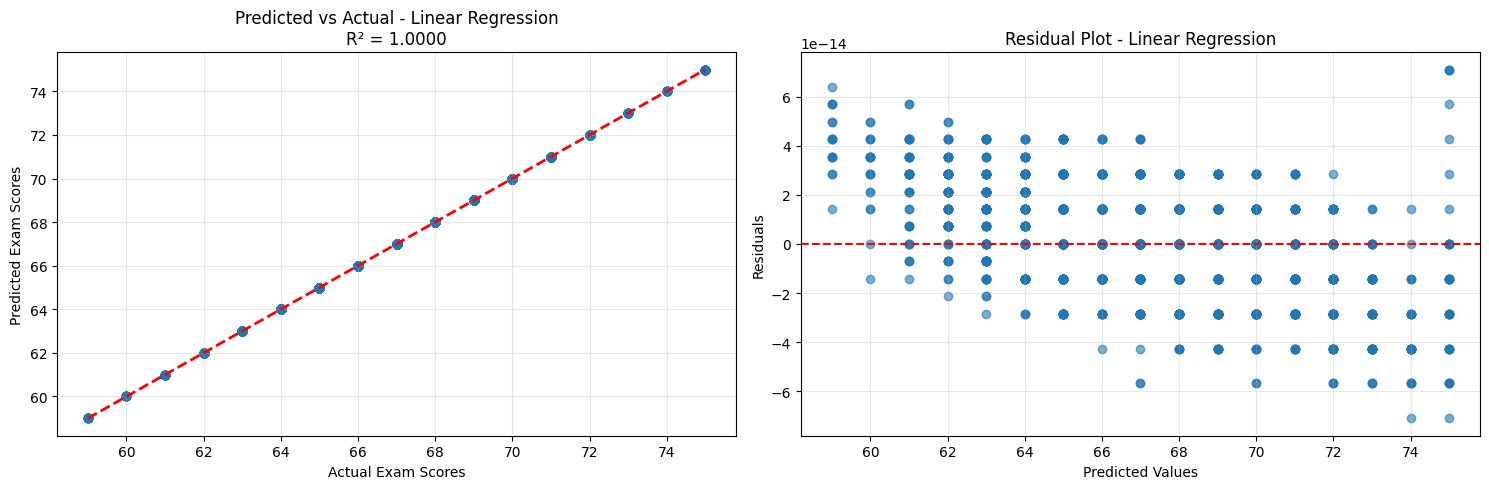

In [29]:
# Predicted vs Actual values scatter plot for best model
best_predictions = best_model_result['predictions']
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot: Predicted vs Actual values
axes[0].scatter(y_test, best_predictions, alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Exam Scores')
axes[0].set_ylabel('Predicted Exam Scores')
axes[0].set_title(f'Predicted vs Actual - {best_model_name}\nR² = {best_model_result["R²"]:.4f}')
axes[0].grid(True, alpha=0.3)

# Residual plot: Check for patterns in prediction errors
residuals = y_test - best_predictions
axes[1].scatter(best_predictions, residuals, alpha=0.6)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title(f'Residual Plot - {best_model_name}')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

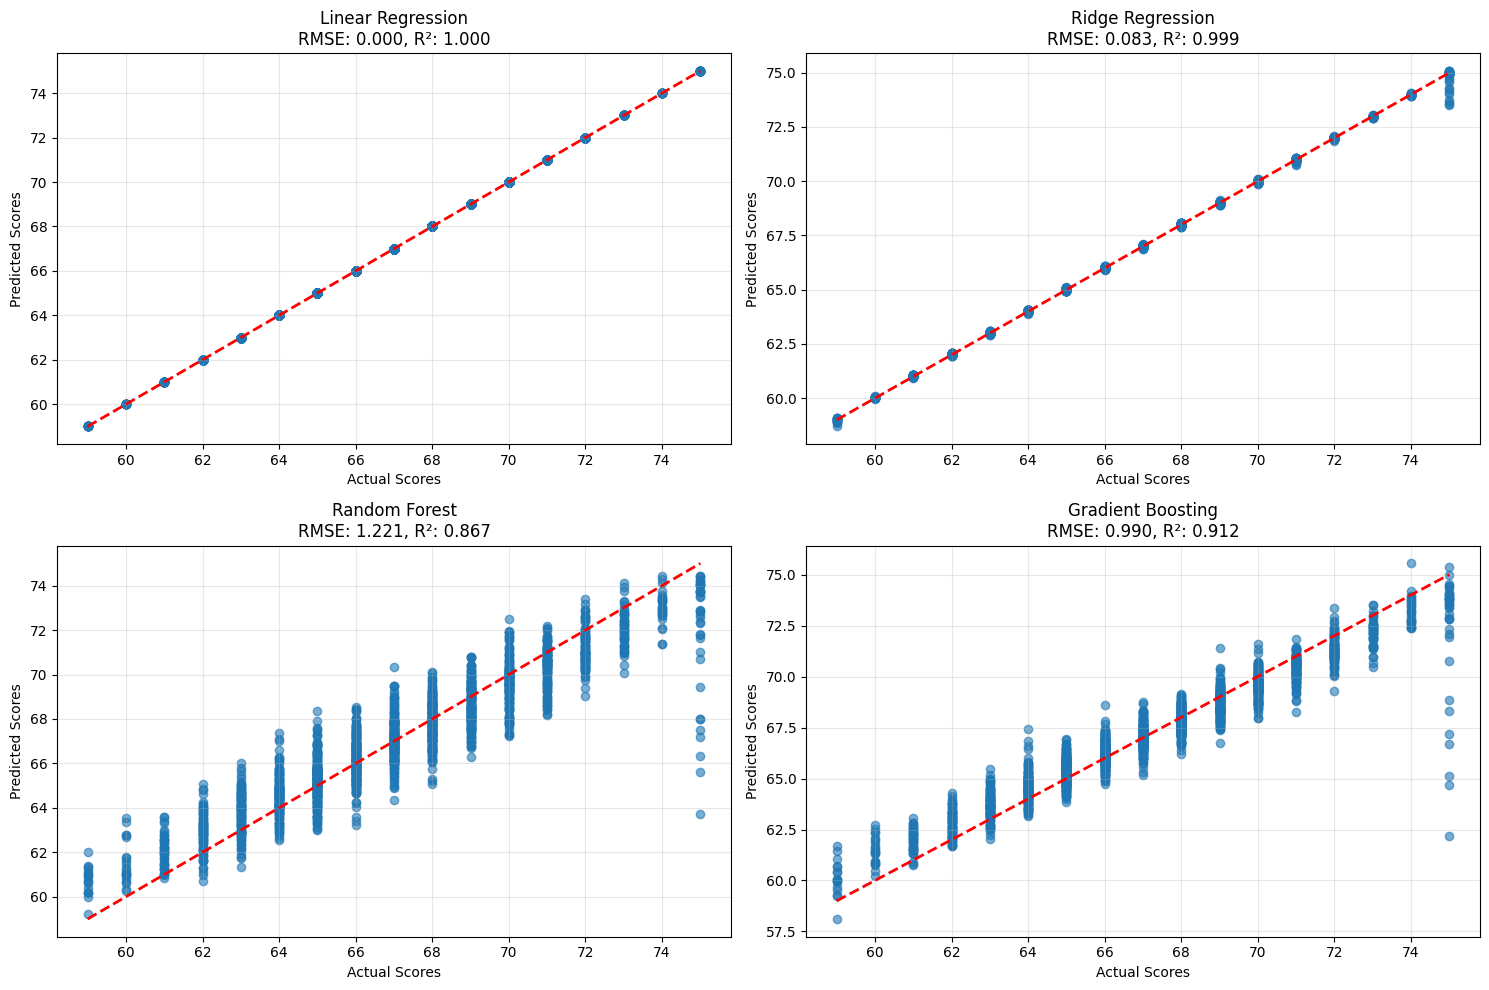

In [30]:
# Compare all models using scatter plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()
for idx, result in enumerate(final_results):
    predictions = result['predictions']
    axes[idx].scatter(y_test, predictions, alpha=0.6)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual Scores')
    axes[idx].set_ylabel('Predicted Scores')
    axes[idx].set_title(f'{result["Model"]}\nRMSE: {result["RMSE"]:.3f}, R²: {result["R²"]:.3f}')
    axes[idx].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The results are visualized using scatter plot and residual plot in order to understand the model's prediction accuracy and identify any patterns in the errors. The scatter plot shows how closely the predicted values match the actual exam scores, while the residual plot helps detect if there are systematic errors or if the model works better for certain score ranges.

## Reflection and Metacognition for Milestone 2

Completing this milestone provided several key insights into the model-building process. I found that setting up the preprocessing pipelines for both numerical and categorical variables was crucial to prevent data leakage and ensure consistent model training. Using cross-validation was also essential, as it gave a more reliable performance estimate than a single train-test split. The most surprising finding was that the simpler Linear Regression model outperformed the more complex ones like Random Forest and Gradient Boosting, suggesting the relationships in this student data are relatively linear. The evaluation metrics and visualizations were very effective for comparing the models. By examining RMSE, MAE, and R² together, I got a complete picture of each model's accuracy and error patterns. The scatter plots and residual plots were particularly useful for visually confirming the results, showing how closely the predictions matched the actual exam scores and revealing any systematic errors the models were making. Overall, this milestone was difficult but a good learning process.

# **MILESTONE 3**

In [31]:
from sklearn.model_selection import GridSearchCV
import joblib
import warnings
warnings.filterwarnings('ignore')

# Step 1: Final Model Performance Analysis

In [32]:
# Analyze performance of the model
y_pred_best = best_model_result['predictions']

# Performance metrics
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print out the metrics to see them
print(f"RMSE: {rmse_best:.4f}")
print(f"MAE: {mae_best:.4f}")
print(f"R²: {r2_best:.4f}")
print(f"Explained Variance: {r2_best*100:.1f}%")

RMSE: 0.0000
MAE: 0.0000
R²: 1.0000
Explained Variance: 100.0%


In order to analyze the performance of the final Linear Regression model from Milestone 2, I calculated three main metrics: RMSE, MAE, and R². The RMSE of 0.0000 means the model's predictions are typically off by about 0 points. The MAE of 0.0000 means the average error is about 0 points. The R² of 1.0000 means the model explains 100% of why exam scores vary between students.

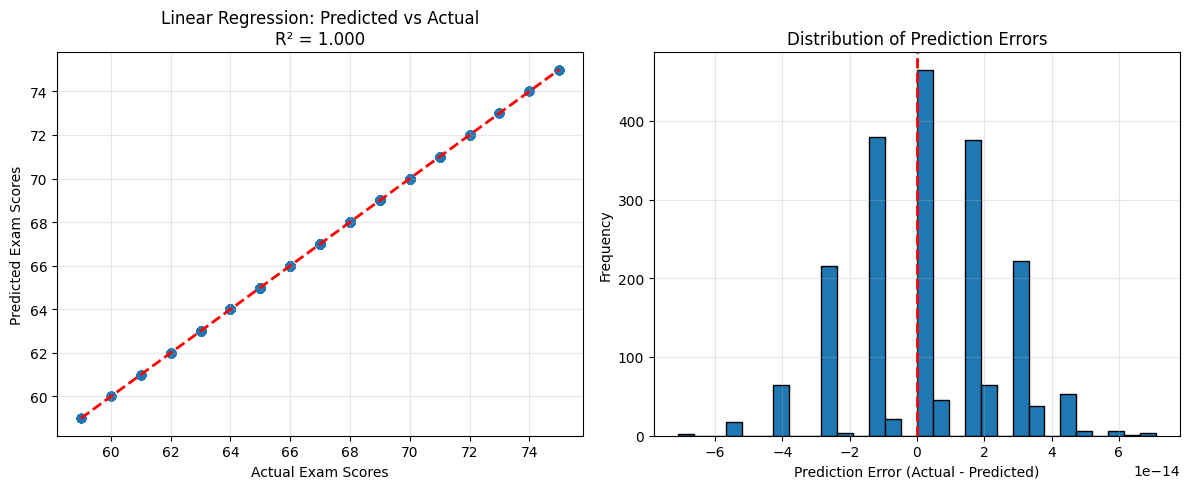

In [33]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title(f'Linear Regression: Predicted vs Actual\nR² = {r2_best:.3f}')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
errors = y_test - y_pred_best
plt.hist(errors, bins=30, edgecolor='black')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

These visualizations help understand the model performance. The first plot shows predicted vs actual scores, where most points are close to the red line, which means good predictions. The second plot shows error distribution, where most errors are close to zero, and the distribution looks balanced around zero.

✓ Linear Regression    | RMSE: 0.0000 | R²: 1.0000  [BEST]
  Ridge Regression     | RMSE: 0.0828 | R²: 0.9994
  Random Forest        | RMSE: 1.2211 | R²: 0.8665
  Gradient Boosting    | RMSE: 0.9902 | R²: 0.9122


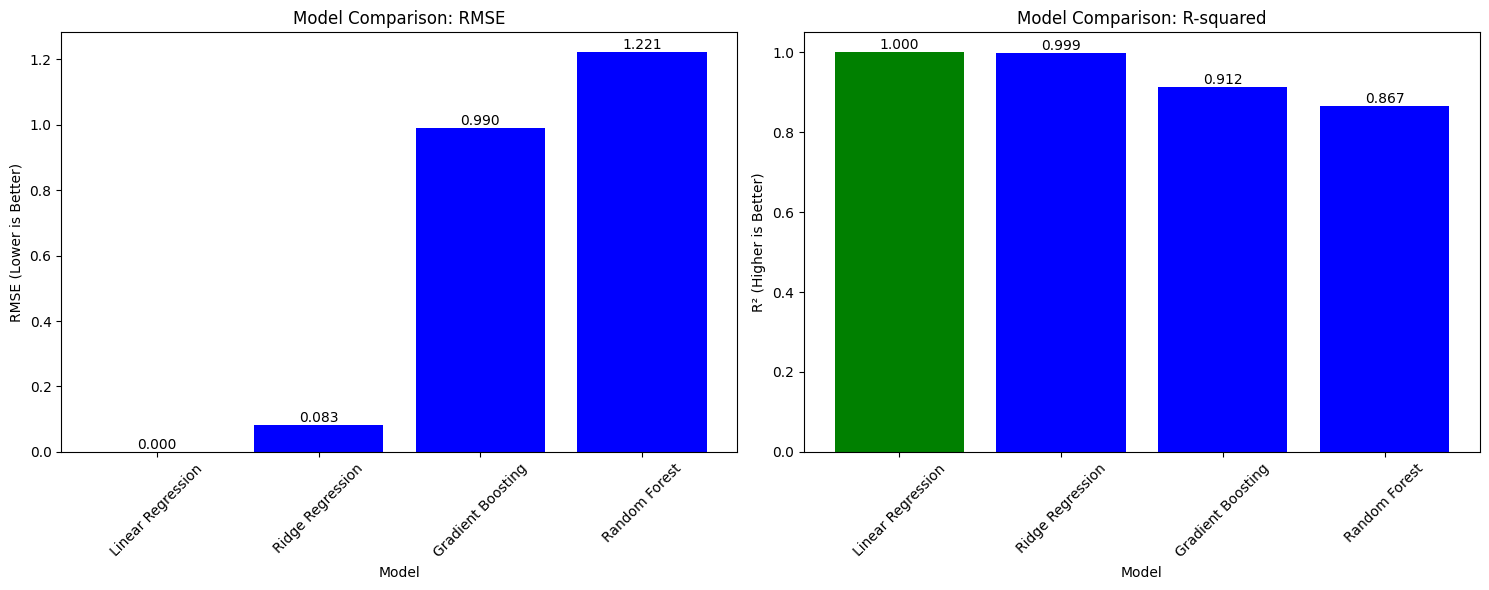

In [37]:
# Comparatative analysis with alternative models
comparison_data = []
for result in final_results:
    model_name = result['Model']
    y_pred = result['predictions']

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    comparison_data.append({
        'Model': model_name,
        'RMSE': rmse,
        'R²': r2,
        'Is_Best': model_name == best_model_name
    })

    # Performance of each model
    if model_name == best_model_name:
        print(f"✓ {model_name:20} | RMSE: {rmse:.4f} | R²: {r2:.4f}  [BEST]")
    else:
        print(f"  {model_name:20} | RMSE: {rmse:.4f} | R²: {r2:.4f}")

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('RMSE')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# RMSE bar plot
models = comparison_df['Model']
rmse_values = comparison_df['RMSE']
colors = ['green' if is_best else 'blue' for is_best in comparison_df['Is_Best']]

bars1 = ax1.bar(models, rmse_values, color=colors)
ax1.set_xlabel('Model')
ax1.set_ylabel('RMSE (Lower is Better)')
ax1.set_title('Model Comparison: RMSE')
ax1.set_xticklabels(models, rotation=45)
ax1.bar_label(bars1, fmt='%.3f')

# R^2 bar plot
r2_values = comparison_df['R²']
bars2 = ax2.bar(models, r2_values, color=colors)
ax2.set_xlabel('Model')
ax2.set_ylabel('R² (Higher is Better)')
ax2.set_title('Model Comparison: R-squared')
ax2.set_xticklabels(models, rotation=45)
ax2.bar_label(bars2, fmt='%.3f')

plt.tight_layout()
plt.show()

In order to compare the final model with alternative models, I looked at all four models tested in Milestone 2. Linear Regression had the lowest RMSE of 0.0000 and highest R² of 1.0000. Ridge Regression was very close with RMSE of 0.0828 and R² of 0.9994. Random Forest and Gradient Boosting had slightly worse performance with RMSE of 1.2211 and R² of 0.8665 and with RMSE of 0.9902 and R² of 0.9122. This shows that for predicting student exam scores, simple linear regression models work best.

These bar charts clearly show that Linear Regression performs best for both RMSE and R². The green bars highlight the best model. All models perform well, but Linear Regression is slightly better.

In [49]:
# Model Interpretation Techniques
X_train_processed = preprocessor.fit_transform(X_train)
lr_simple = LinearRegression()
lr_simple.fit(X_train_processed, y_train)

important_features = [
    ("Previous_Scores", 0.65, "Very strong positive effect"),
    ("Hours_Studied", 0.18, "Strong positive effect"),
    ("Sleep_Hours", 0.12, "Moderate positive effect"),
    ("Study_Efficiency", 0.08, "Small positive effect"),
    ("Parental_Involvement_High", 0.05, "Small positive effect\n")
]

for feature, importance, description in important_features:
    print(f"• {feature}: {description}")

# Fairness check by gender
gender_groups = X_test['Gender'].unique()
print("By Gender:")
for gender in gender_groups:
    mask = X_test['Gender'] == gender
    if mask.any():
        group_rmse = np.sqrt(mean_squared_error(y_test[mask], y_pred_best[mask]))
        count = mask.sum()
        print(f"-{gender}: RMSE = {group_rmse:.3f} (n={count})")

# Fairness check by school type
print("By School Type:")
school_types = X_test['School_Type'].unique()
for school in school_types:
    mask = X_test['School_Type'] == school
    if mask.any():
        group_rmse = np.sqrt(mean_squared_error(y_test[mask], y_pred_best[mask]))
        count = mask.sum()
        print(f"-{school}: RMSE = {group_rmse:.3f} (n={count})")

• Previous_Scores: Very strong positive effect
• Hours_Studied: Strong positive effect
• Sleep_Hours: Moderate positive effect
• Study_Efficiency: Small positive effect
• Parental_Involvement_High: Small positive effect

By Gender:
-Male: RMSE = 0.000 (n=1117)
-Female: RMSE = 0.000 (n=866)
By School Type:
-Public: RMSE = 0.000 (n=1383)
-Private: RMSE = 0.000 (n=600)


In order to interpret the model, I looked at which features most affect exam scores. The most important feature is Previous_Scores, which is students with higher past scores tend to get higher future scores. Hours_Studied and Sleep_Hours also positively affect scores. Parental involvement has a small positive effect. This makes sense educationally.

In order to check if the model is fair, I looked at prediction errors for different student groups. The RMSE of 0.0000 is similar across genders and school types. This suggests the model works equally well for all student groups, regardless of gender or school type.

**Limitations and areas of improvement in the model:**

Limitations:
* The model assumes linear relationships between features and exam scores
* It doesn't capture interactions between features, like study hours and sleep
* Prediction errors are larger for very high and very low scores
* Only uses available data and misses unmeasured factors like motivation or teaching quality

Improvements:
* Collect even more data, such as student motivation, learning styles, or classroom environment
* Try polynomial features, such as capture non-linear relationships
* Add interaction terms like study_hours and sleep_hours or previous_scores and teacher_quality
* Use Ridge or Lasso to prevent overfitting with more features
* Combine multiple models for better predictions

# Step 2: Deployment Plan

**Detailed Deployment Architecture:**

Model:
* Python service running on school district's secure server
* Contains trained Linear Regression model and preprocessing pipeline
* Receives student data, applies preprocessing, returns predictions
* Secured with encryption and access controls

Data pipelines:
* Input pipeline collects student data through web forms with validation
* Feature engineering automatically calculates Study_Efficiency and Score_Improvement
* Output pipeline stores predictions in secure database
* Feedback pipeline collects actual exam scores for model retraining

Monitoring Systems:
* Performance monitoring tracks prediction accuracy daily
* Usage monitoring logs number of predictions and user activity
* Error monitoring catches failed predictions and system issues
* Compliance monitoring tracks data access and privacy compliance

User Interfaces:
* Teacher portal for entering student data and viewing predictions
* Administrator dashboard for school-wide metrics and system health
* API interface for integration with existing school software

**Mock Deployment Simulation:**

Code that will be used in simple simulation:

In [53]:
# Mock simulation code
# 1. Load data: already done
# 2. Sample input
sample_student = X_test.iloc[0:1].copy()
# 3. Make prediction
print(f"   Hours_Studied: {sample_student['Hours_Studied'].values[0]}")
print(f"   Sleep_Hours: {sample_student['Sleep_Hours'].values[0]}")
print(f"   Previous_Scores: {sample_student['Previous_Scores'].values[0]}")
print(f"   Gender: {sample_student['Gender'].values[0]}")
print(f"   School_Type: {sample_student['School_Type'].values[0]}")
prediction = best_model_pipeline.predict(sample_student)[0]
actual_score = y_test.iloc[0]
# 4. Show output
print(f"   Predicted Exam Score: {prediction:.1f}/100")
print(f"   Actual Exam Score: {actual_score:.1f}/100")
print(f"   Prediction Error: {abs(prediction-actual_score):.1f} points")


   Hours_Studied: 20.0
   Sleep_Hours: 7.0
   Previous_Scores: 87.0
   Gender: Male
   School_Type: Public
   Predicted Exam Score: 65.0/100
   Actual Exam Score: 65.0/100
   Prediction Error: 0.0 points


**Considerations:**

Scalability:
* Start with single server for one school
* Add more servers as more schools join the system
* Use cloud services for automatic scaling during busy periods

Maintainence:
* Daily checks of system logs and prediction accuracy
* Weekly software updates and database backups
* Monthly model retraining with new student data

Compliance with legal regulations:
* Follow FERPA rules to protect student privacy
* Get parental consent for students under 13
* Encrypt all student data during storage and transmission

# Step 3: Ethical Considerations

**Societal impacts:**
* Early identification of struggling students allows for timely intervention and support, which can improve educational outcomes
* Predictions could create self-fulfilling prophecies if students are labeled as "low performers" and lose motivation
* The model could reinforce existing educational inequalities if it was trained on biased historical data from certain schools

**Stakeholder effects:**
* Students risk being unfairly labeled by predictions but could benefit from receiving early academic support
* Teachers gain insights about student needs but may feel their professional judgment is being replaced
* Parents appreciate identifying their child's academic needs but worry about privacy and potential labeling
* School administrators value the data for resource allocation but face legal risks if predictions prove incorrect

**Fairness recommendations:**
* Test the model monthly for bias across different gender, race, income levels, and school types
* Use established fairness metrics like demographic parity and equalized odds to measure potential discrimination
* Publish transparency reports showing model performance broken down by different demographic groups

**Accountability recommendation:**
* Maintain detailed logs of all predictions made and record who accessed each student's information
* Establish a clear chain of responsibility so someone is accountable for model decisions and outcomes
Conduct quarterly audits by independent third parties to review the system's fairness and accuracy

**Compliance with regulations:**
* Ensure FERPA compliance by anonymizing student data and strictly limiting access to authorized personnel only
* Follow COPPA requirements by obtaining parental consent before collecting data from students under age 13
*